In [208]:
# all the important imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np  ## data manipulation
import pandas as pd   ## data frames
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # encoding the categorical datas
import matplotlib.pyplot as plt ## for plotting the graphs
from sklearn.svm import SVC ## for Support Vector Machine Algo
from sklearn.naive_bayes import GaussianNB ## for Naive Bayes 
from sklearn.ensemble import RandomForestClassifier ## for Random Forest
from sklearn import linear_model ## for Multiple Linear Regression
from sklearn.linear_model import LogisticRegression ## for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier ## for KNN
from sklearn.metrics import accuracy_score, confusion_matrix # for accuracy_score and confusion_matrix

In [209]:
# loading the training and testing datasets
training_data = pd.read_csv("Training.csv")
testing_data = pd.read_csv("Testing.csv")

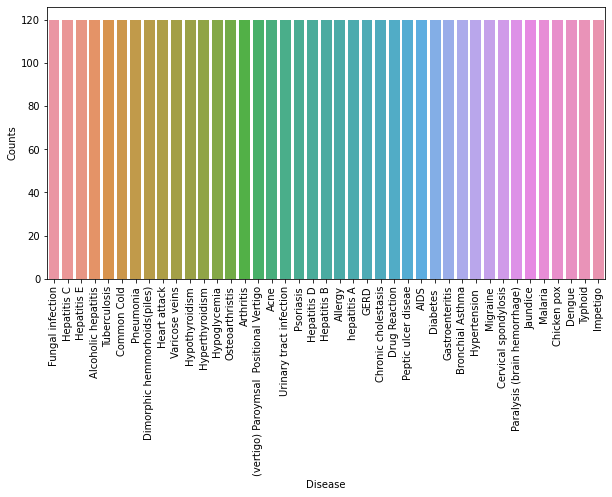

In [210]:
# getting the dimensions of the datafram 
#training_data.shape (4920, 134)
#testing_data.shape (42, 133)

# updating the training set by dropping the "unnamed: 133" column
training_data = training_data.drop("Unnamed: 133", axis="columns")

disease_counts = training_data['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize = (10,5))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

# the training data is balanced :)

In [211]:
## encoding the target categorical values
encoder = LabelEncoder()
training_data["prognosis"] = encoder.fit_transform(training_data["prognosis"])
training_data["prognosis"].value_counts() # shows the encoded value corresponding to each diagnosed disease(42)

testing_data["prognosis"] = encoder.fit_transform(testing_data["prognosis"])
testing_data["prognosis"].value_counts()


15    2
20    1
22    1
3     1
36    1
10    1
34    1
13    1
18    1
39    1
26    1
24    1
25    1
31    1
5     1
0     1
2     1
38    1
35    1
21    1
19    1
4     1
40    1
16    1
9     1
14    1
33    1
1     1
12    1
17    1
6     1
23    1
30    1
7     1
32    1
28    1
29    1
8     1
11    1
37    1
27    1
Name: prognosis, dtype: int64

In [212]:
# splitting the training_data and testing_data into target values and features
training_data_features = training_data.iloc[:, : -1]
training_data_target = training_data.iloc[:,-1]
testing_data_features = testing_data.iloc[:, : -1]
testing_data_target = testing_data.iloc[:, -1]

In [213]:
# applying SVM 
svm_model = SVC()
svm_model.fit(training_data_features, training_data_target)
preds = svm_model.predict(testing_data_features)

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


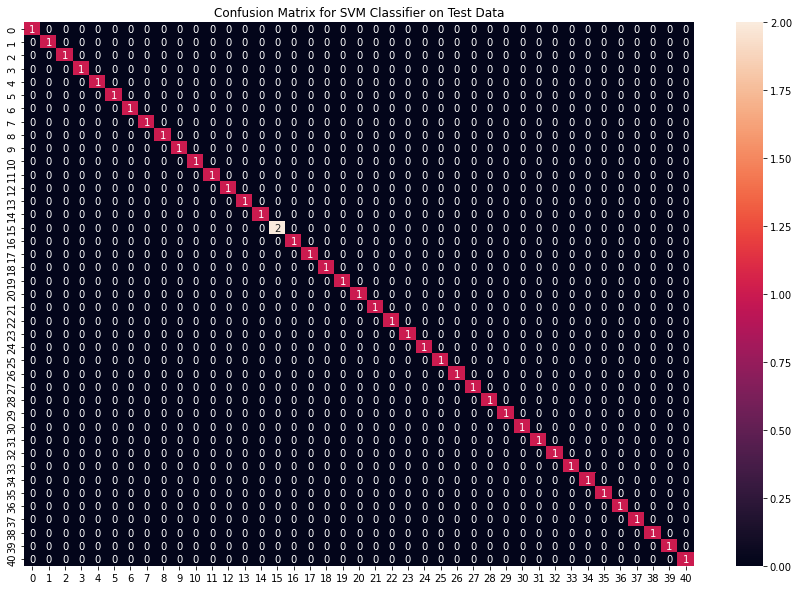

In [214]:
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(training_data_target, svm_model.predict(training_data_features))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(testing_data_target, preds)*100}")
cf_matrix = confusion_matrix(testing_data["prognosis"], preds)
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [215]:
# applying Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(training_data_features, training_data_target)
preds = nb_model.predict(testing_data_features)

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


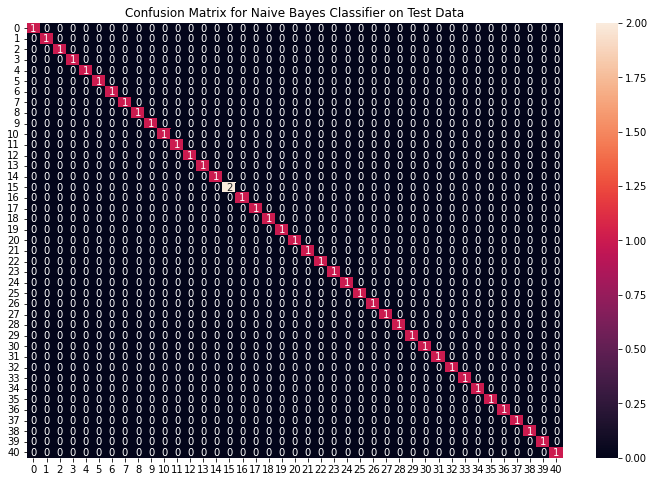

In [216]:
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(training_data_target, nb_model.predict(training_data_features))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(testing_data_target, preds)*100}")
cf_matrix = confusion_matrix(testing_data["prognosis"], preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [217]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(training_data_features, training_data_target)
preds = rf_model.predict(testing_data_features)

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 97.61904761904762


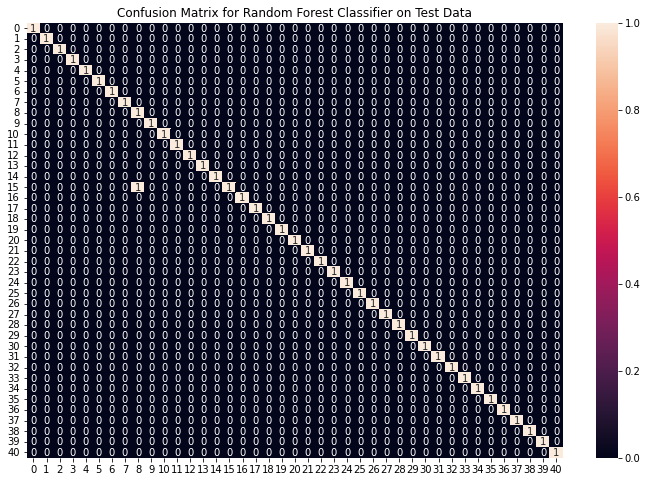

In [218]:
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(training_data_target, rf_model.predict(training_data_features))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(testing_data_target, preds)*100}")
 
cf_matrix = confusion_matrix(testing_data["prognosis"], preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [219]:
# Multiple Linear Regression
regr = linear_model.LinearRegression()
regr.fit(training_data_features, training_data_target)

LinearRegression()

In [220]:
# type([testing_data_features.iloc[0, :]]) -> List

# for i in range(testing_data_features.shape[0])
preds = []
for i in range(testing_data_features.shape[0]):
  prediction = regr.predict([testing_data_features.iloc[i,:]])
  prediction = int(np.round(prediction))
  preds.append(prediction)
# preds  # shows the predicted values in list rounding off to the nearest target value

The Score of Multiple Linear Regression is :  0.5238095238095238

Confusion Matrix



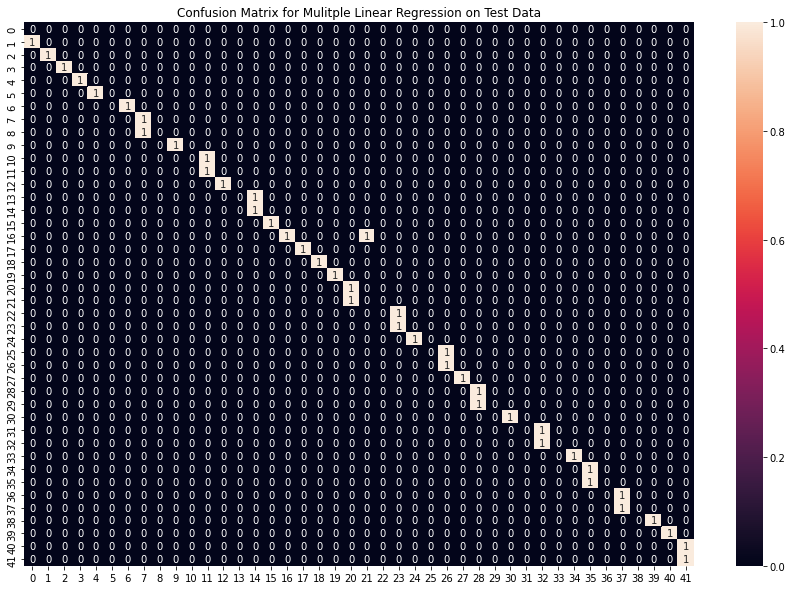

In [221]:
length = len(testing_data_target)
correct = 0
for i in range(length):
  if(testing_data_target[i] == preds[i]):
    correct += 1
print("The Score of Multiple Linear Regression is : ", correct/length)
cm = confusion_matrix(testing_data_target, preds)
print("\nConfusion Matrix\n")
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Mulitple Linear Regression on Test Data")
plt.show()


In [222]:
# Logistic Regression

lreg= LogisticRegression()
lreg.fit(training_data_features, training_data_target)

y_predicted = lreg.predict(testing_data_features)

The Accuracy of the Logistic Regression is :  100.0

Confusion Matrix



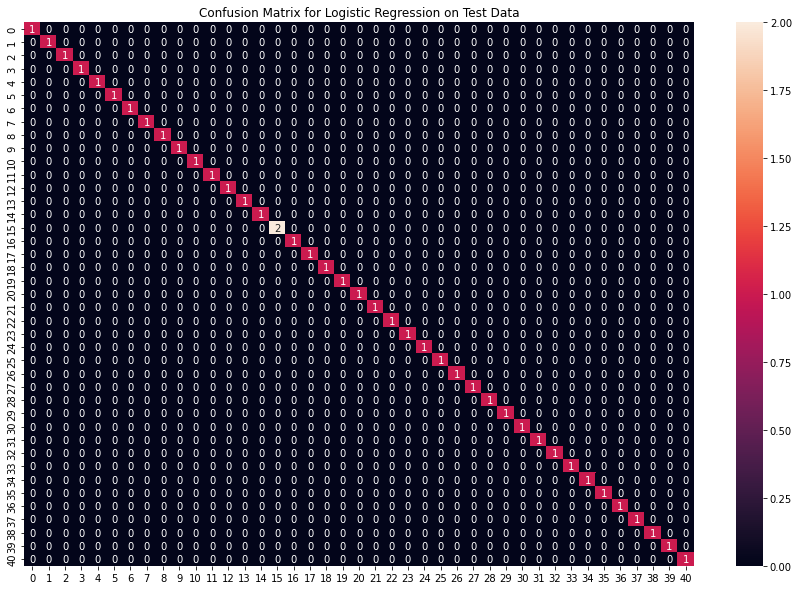

In [223]:
# Accuracy Score and Confusion Matrix
score = lreg.score(testing_data_features, testing_data_target)*100
cm = confusion_matrix(testing_data_target, y_predicted)
print("The Accuracy of the Logistic Regression is : ", score)
print("\nConfusion Matrix\n")
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

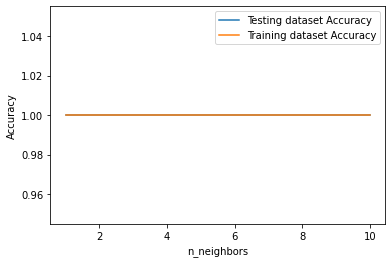

In [224]:
# K-Nearest Neighbour
train_accuracy = []
test_accuracy = []

# testing the k values in the range (1,11)
neighbors = np.arange(1, 11)
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(training_data_features, training_data_target)
      
  # Compute training and test data accuracy
  train_accuracy.append(knn.score(training_data_features, training_data_target))
  test_accuracy.append(knn.score(testing_data_features, testing_data_target))

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


# we can use any k value, since it's giving accuracy of 1 at each value of k

The Accuracy of the KNN is :  0.5238095238095238

Confusion Matrix



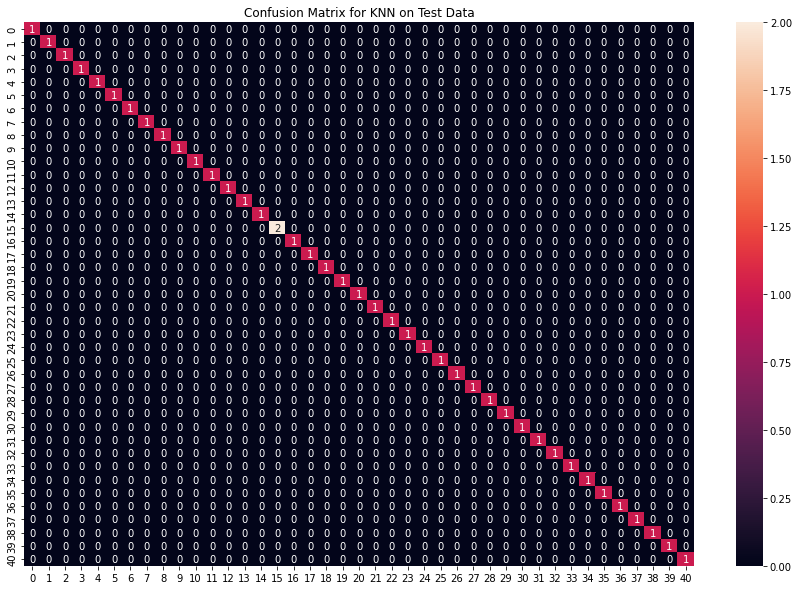

In [225]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(training_data_features, training_data_target)

predsKNN = knn.predict(testing_data_features)

correctKNN = 0
for i in range(len(preds)):
  if(testing_data_target[i] == preds[i]):
    correctKNN += 1
print("The Accuracy of the KNN is : ", correctKNN/len(preds))

cmKNN = confusion_matrix(testing_data_target, predsKNN)
print("\nConfusion Matrix\n")
plt.figure(figsize=(15,10))
sns.heatmap(cmKNN, annot=True)
plt.title("Confusion Matrix for KNN on Test Data")
plt.show()
  